In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install transformers
!pip install datasets
!pip install faiss-cpu
!pip install scikit-learn
!pip install pandas
!pip install tqdm
!pip install bitsandbytes
!pip install nltk
!pip install sentence-transformers
!pip install peft
!pip install accelerate
!pip install huggingface_hub
!pip install matplotlib
!pip install seaborn

Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s e

In [2]:
!git clone https://github.com/florin-git/The-Power-of-Noise.git
%cd The-Power-of-Noise

Cloning into 'The-Power-of-Noise'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 125 (delta 29), reused 42 (delta 12), pack-reused 50 (from 1)
Receiving objects: 100% (125/125), 110.10 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (53/53), done.
/content/The-Power-of-Noise


In [3]:
import torch
print(torch.cuda.is_available())

True


In [4]:
import os
print(os.listdir('data'))

['mappings', 'contriever_test_search_results_at150.pkl', 'processed', 'contriever_search_results_at150.pkl', '10k_other_random_results_at60.pkl', 'test_dataset.json', '10k_train_dataset.json', 'bm25_test_search_results_at250.pkl', 'adore_search_results_at200.pkl', '10k_random_results_at60.pkl']


In [5]:
import json
import pickle

# Check train dataset
with open('data/10k_train_dataset.json', 'r') as f:
    train_data = json.load(f)

print("Number of training questions:", len(train_data))

# Check test dataset
with open('data/test_dataset.json', 'r') as f:
    test_data = json.load(f)

print("Number of test questions:", len(test_data))

# Check random noise corpus
with open('data/10k_random_results_at60.pkl', 'rb') as f:
    random_noise = pickle.load(f)

print("Random noise samples:", len(random_noise))

Number of training questions: 10000
Number of test questions: 2889
Random noise samples: 10000


In [6]:
import pickle

# Load Contriever retrieval results
with open('data/contriever_search_results_at150.pkl', 'rb') as f:
    contriever_retrievals = pickle.load(f)

print("Loaded Contriever retrievals:", len(contriever_retrievals))

# Load BM25 retrieval results
with open('data/bm25_test_search_results_at250.pkl', 'rb') as f:
    bm25_retrievals = pickle.load(f)

print("Loaded BM25 retrievals:", len(bm25_retrievals))

# Load ADORE retrieval results
with open('data/adore_search_results_at200.pkl', 'rb') as f:
    adore_retrievals = pickle.load(f)

print("Loaded ADORE retrievals:", len(adore_retrievals))

# Load Random Noise retrievals
with open('data/10k_random_results_at60.pkl', 'rb') as f:
    random_noise_retrievals = pickle.load(f)

print("Loaded Random noise retrievals:", len(random_noise_retrievals))

Loaded Contriever retrievals: 10000
Loaded BM25 retrievals: 2889
Loaded ADORE retrievals: 10000
Loaded Random noise retrievals: 10000


In [7]:
import os

print(os.listdir('data/processed'))

['corpus_with_random_50_words.pkl']


In [8]:
print(os.listdir('data/mappings'))

['subset_to_full_adore_at200_in_corpus.pkl', 'full_to_subset_test_random_contriever_in_corpus.pkl', 'full_to_subset_random_contriever_in_corpus.pkl', 'subset_to_full_random_at60_in_corpus.pkl', 'subset_to_full_contriever_at150_in_corpus.pkl', 'full_to_subset_contriever_at150_in_corpus.pkl', 'full_to_subset_random_at60_in_corpus.pkl', 'desktop.ini', 'subset_to_full_random_contriever_in_corpus.pkl', 'full_to_subset_adore_at200_in_corpus.pkl', 'full_to_subset_test_random_bm25_in_corpus.pkl', 'subset_to_full_test_random_contriever_in_corpus.pkl', 'subset_to_full_test_random_bm25_in_corpus.pkl']


In [9]:
from datasets import load_dataset
dataset = load_dataset("wikipedia", "20220301.en", split="train[:1%]")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/16.0k [00:00<?, ?B/s]

wikipedia.py:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


train-00000-of-00041.parquet:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

train-00001-of-00041.parquet:   0%|          | 0.00/705M [00:00<?, ?B/s]

train-00002-of-00041.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

train-00003-of-00041.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

train-00004-of-00041.parquet:   0%|          | 0.00/431M [00:00<?, ?B/s]

train-00005-of-00041.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

train-00006-of-00041.parquet:   0%|          | 0.00/366M [00:00<?, ?B/s]

train-00007-of-00041.parquet:   0%|          | 0.00/326M [00:00<?, ?B/s]

train-00008-of-00041.parquet:   0%|          | 0.00/329M [00:00<?, ?B/s]

train-00009-of-00041.parquet:   0%|          | 0.00/312M [00:00<?, ?B/s]

train-00010-of-00041.parquet:   0%|          | 0.00/267M [00:00<?, ?B/s]

train-00011-of-00041.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00012-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00013-of-00041.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

train-00014-of-00041.parquet:   0%|          | 0.00/222M [00:00<?, ?B/s]

train-00015-of-00041.parquet:   0%|          | 0.00/236M [00:00<?, ?B/s]

train-00016-of-00041.parquet:   0%|          | 0.00/215M [00:00<?, ?B/s]

train-00017-of-00041.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

train-00018-of-00041.parquet:   0%|          | 0.00/241M [00:00<?, ?B/s]

train-00019-of-00041.parquet:   0%|          | 0.00/228M [00:00<?, ?B/s]

train-00020-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00021-of-00041.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00022-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00023-of-00041.parquet:   0%|          | 0.00/226M [00:00<?, ?B/s]

train-00024-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00025-of-00041.parquet:   0%|          | 0.00/218M [00:00<?, ?B/s]

train-00026-of-00041.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

train-00027-of-00041.parquet:   0%|          | 0.00/206M [00:00<?, ?B/s]

train-00028-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00029-of-00041.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

train-00030-of-00041.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

train-00031-of-00041.parquet:   0%|          | 0.00/216M [00:00<?, ?B/s]

train-00032-of-00041.parquet:   0%|          | 0.00/200M [00:00<?, ?B/s]

train-00033-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00034-of-00041.parquet:   0%|          | 0.00/201M [00:00<?, ?B/s]

train-00035-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00036-of-00041.parquet:   0%|          | 0.00/199M [00:00<?, ?B/s]

train-00037-of-00041.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00038-of-00041.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

train-00039-of-00041.parquet:   0%|          | 0.00/192M [00:00<?, ?B/s]

train-00040-of-00041.parquet:   0%|          | 0.00/185M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6458670 [00:00<?, ? examples/s]

In [10]:
import pandas as pd

corpus = pd.DataFrame({
    'id': list(range(len(dataset))),
    'text': dataset['text']
})
print(corpus.head())

   id                                               text
0   0  Anarchism is a political philosophy and moveme...
1   1  Autism is a neurodevelopmental disorder charac...
2   2  Albedo (; ) is the measure of the diffuse refl...
3   3  A, or a, is the first letter and the first vow...
4   4  Alabama () is a state in the Southeastern regi...


In [11]:
import random

def get_top_docs_from_corpus(corpus, top_k=5):
    doc_indices = random.sample(range(len(corpus)), top_k)
    docs = corpus.loc[doc_indices, 'text'].tolist()
    return docs

top_docs = get_top_docs_from_corpus(corpus, top_k=5)
print("Sample Retrieved Docs:\n", top_docs)

Sample Retrieved Docs:
 ['In computing, a device driver is a computer program that operates or controls a particular type of device that is attached to a computer or automaton. A driver provides a software interface to hardware devices, enabling operating systems and other computer programs to access hardware functions without needing to know precise details about the hardware being used.\n\nA driver communicates with the device through the computer bus or communications subsystem to which the hardware connects. When a calling program invokes a routine in the driver, the driver issues commands to the device (drives it). Once the device sends data back to the driver, the driver may invoke routines in the original calling program.\n\nDrivers are hardware dependent and operating-system-specific. They usually provide the interrupt handling required for any necessary asynchronous time-dependent hardware interface.\n\nPurpose\nThe main purpose of device drivers is to provide abstraction by a

In [12]:
def build_prompt(query, gold_docs, noise_docs, gold_first=True, max_total_words=1500):
    prompt_parts = []
    prompt_parts.append(f"Question: {query}\n\n")
    all_docs = gold_docs + noise_docs
    if not gold_first:
        random.shuffle(all_docs)

    total_words = 0
    for idx, doc in enumerate(all_docs):
        words = doc.split()
        if total_words + len(words) > max_total_words:
            break  # Stop adding more documents if limit exceeded

        prompt_parts.append(f"Document {idx+1}:\n{' '.join(words)}\n\n")
        total_words += len(words)
    prompt = "\n".join(prompt_parts)
    return prompt
# Simulate a query
query = "What is the history of Vinton, Iowa?"

# Use the top_docs you retrieved as 'gold docs'
gold_docs = top_docs[:2]
noise_docs = top_docs[2:4]

# Build the prompt
prompt = build_prompt(query, gold_docs, noise_docs)

print(prompt)

Question: What is the history of Vinton, Iowa?




In [13]:
!pip install transformers accelerate bitsandbytes

In [14]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load Phi-2 Model (small, efficient)
model_name = "microsoft/phi-2"

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",  # Automatically map model to GPU
    torch_dtype=torch.float16,
    trust_remote_code=True
)

tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [15]:
def generate_answer(prompt, model, tokenizer, max_new_tokens=5):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=False,  # deterministic output
        temperature=0.0    # no randomness
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text[len(prompt):]  # remove prompt part

answer = generate_answer(prompt, model, tokenizer, max_new_tokens=5)
print("Generated Answer:", answer)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Answer: 
Answer: Vinton


In [16]:
gold_docs = top_docs[:1]
noise_docs = top_docs[1:2]

# Build new short prompt
prompt = build_prompt(query, gold_docs, noise_docs, gold_first=True, max_total_words=700)

# Print token length
inputs = tokenizer(prompt)
print("Prompt token length:", len(inputs['input_ids']))  # should be less than 2048

# Generate answer
answer = generate_answer(prompt, model, tokenizer, max_new_tokens=5)
print("Generated Answer:", answer)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt token length: 13
Generated Answer: 
Answer: Vinton


In [17]:
import pandas as pd
from tqdm import tqdm

In [18]:
# Function to build one prompt (with small size to avoid token overflow)
def build_prompt_batch(query, gold_docs, noise_docs, max_total_words=700):
    prompt_parts = [f"Question: {query}\n\n"]

    all_docs = gold_docs + noise_docs
    random.shuffle(all_docs)  # mix gold + noise

    total_words = 0
    for idx, doc in enumerate(all_docs):
        words = doc.split()
        if total_words + len(words) > max_total_words:
            break
        prompt_parts.append(f"Document {idx+1}:\n{' '.join(words)}\n\n")
        total_words += len(words)

    return "\n".join(prompt_parts)

In [19]:
def generate_answer_batch(prompt, model, tokenizer, max_new_tokens=5):
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        temperature=0.0
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text[len(prompt):].strip()

In [20]:
# Initialize results list
results = []

# Let's just test for first 100 queries to start
NUM_QUERIES = 100

for idx in tqdm(range(NUM_QUERIES)):
    try:
        # Sample query
        query = train_data[idx]['question'] if isinstance(train_data[idx], dict) else train_data[idx][0]

        # Get random docs for gold and noise
        gold_docs = get_top_docs_from_corpus(corpus, top_k=1)  # 1 gold
        noise_docs = get_top_docs_from_corpus(corpus, top_k=1) # 1 noise

        # Build prompt
        prompt = build_prompt_batch(query, gold_docs, noise_docs)

        # Generate answer
        answer = generate_answer_batch(prompt, model, tokenizer)

        # Save results
        results.append({
            "Query": query,
            "Prompt": prompt,
            "Generated_Answer": answer
        })

    except Exception as e:
        print(f"Error at index {idx}: {e}")

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|          | 1/100 [00:00<00:28,  3.48it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 2/100 [00:00<00:30,  3.18it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `d

In [21]:
df_results = pd.DataFrame(results)
df_results.to_csv("batch_generated_answers.csv", index=False)
print("Batch generation completed and saved to 'batch_generated_answers.csv'")

Batch generation completed and saved to 'batch_generated_answers.csv'


In [22]:
import pandas as pd

# Load the results
df = pd.read_csv("batch_generated_answers.csv")

# Define a simple function to mark valid answers
def evaluate_answer(row):
    answer = str(row['Generated_Answer']).strip().lower()
    query = str(row['Query']).strip().lower()

    # Rule 1: Answer should not be empty
    if not answer:
        return 0

    # Rule 2: Answer length should be reasonable
    if len(answer) < 2:
        return 0

    # Rule 3: Answer should be meaningful (not just "A." or "Question:")
    meaningless_starts = ['a.', 'question', 'args:', 'from clue', 'document']
    if any(answer.startswith(bad) for bad in meaningless_starts):
        return 0

    # If passed all checks = Acceptable
    return 1

# Apply evaluation
df['Is_Correct'] = df.apply(evaluate_answer, axis=1)

# Calculate simple accuracy
accuracy = df['Is_Correct'].mean()

print(f"Approximate Accuracy = {accuracy * 100:.2f}%")

# Save evaluated results
df.to_csv("batch_generated_answers_evaluated.csv", index=False)
print("Evaluated CSV saved as 'batch_generated_answers_evaluated.csv'")


Approximate Accuracy = 62.00%
Evaluated CSV saved as 'batch_generated_answers_evaluated.csv'


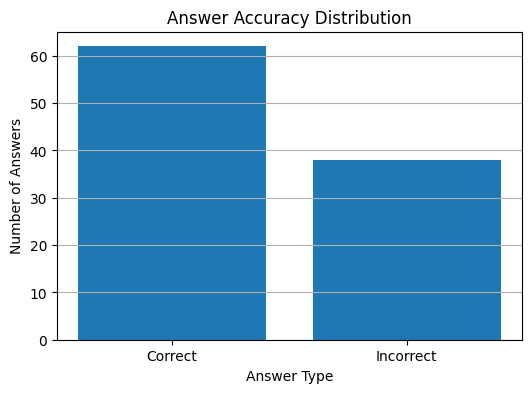

Plot saved as 'The-Power-of-Noise/accuracy_distribution.png'


In [26]:
import matplotlib.pyplot as plt
labels = ['Correct', 'Incorrect']
counts = [
    df['Is_Correct'].sum(),                     # number of correct answers
    len(df) - df['Is_Correct'].sum()     # number of incorrect answers
]
plt.figure(figsize=(6, 4))
plt.bar(labels, counts)
plt.title('Answer Accuracy Distribution')
plt.ylabel('Number of Answers')
plt.xlabel('Answer Type')
plt.grid(axis='y')
plt.savefig("accuracy_distribution.png")
plt.show()

print("Plot saved as 'The-Power-of-Noise/accuracy_distribution.png'")


In [27]:
import pandas as pd
from tqdm import tqdm
import random

train_data = pd.read_json('data/10k_train_dataset.json')

def build_prompt_noise(query, gold_docs, noise_docs, gold_first=True, max_total_words=700):
    prompt_parts = [f"Question: {query}\n\n"]

    all_docs = gold_docs + noise_docs
    if not gold_first:
        random.shuffle(all_docs)

    total_words = 0
    for idx, doc in enumerate(all_docs):
        words = doc.split()
        if total_words + len(words) > max_total_words:
            break
        prompt_parts.append(f"Document {idx+1}:\n{' '.join(words)}\n\n")
        total_words += len(words)

    return "\n".join(prompt_parts)

def generate_answer(prompt, model, tokenizer, max_new_tokens=5):
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True).to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=False,
        temperature=0.0
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text[len(prompt):].strip()

def evaluate_answer(row):
    answer = str(row['Generated_Answer']).strip().lower()
    if not answer:
        return 0
    if len(answer) < 2:
        return 0
    meaningless_starts = ['a.', 'question', 'args:', 'from clue', 'document']
    if any(answer.startswith(bad) for bad in meaningless_starts):
        return 0
    return 1

In [28]:
noise_levels = [1, 2, 3, 4]
accuracies = []

NUM_QUERIES = 100
for noise_level in noise_levels:
    print(f"Running experiment: 1 gold + {noise_level} noise docs")
    results = []

    for idx in tqdm(range(NUM_QUERIES)):
      try:
          query = train_data.iloc[idx]['question']  # <<<<<< Correct way to get query text

          gold_docs = get_top_docs_from_corpus(corpus, top_k=1)
          noise_docs = get_top_docs_from_corpus(corpus, top_k=noise_level)

          prompt = build_prompt_noise(query, gold_docs, noise_docs)
          answer = generate_answer(prompt, model, tokenizer)

          results.append({
              "Query": query,
              "Prompt": prompt,
              "Generated_Answer": answer
          })
      except Exception as e:
          print(f"Error at index {idx}: {e}")

    # Save results
    df_results = pd.DataFrame(results)
    save_path = f"results_gold1_noise{noise_level}.csv"
    df_results.to_csv(save_path, index=False)

    # Evaluate
    df_results['Is_Correct'] = df_results.apply(evaluate_answer, axis=1)
    accuracy = df_results['Is_Correct'].mean()
    accuracies.append(accuracy)

    print(f"Accuracy for 1 gold + {noise_level} noise docs = {accuracy * 100:.2f}%")

Running experiment: 1 gold + 1 noise docs


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|          | 1/100 [00:00<00:50,  1.96it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 2/100 [00:00<00:45,  2.15it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `d

Accuracy for 1 gold + 1 noise docs = 25.00%
Running experiment: 1 gold + 2 noise docs


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|          | 1/100 [00:00<00:25,  3.91it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 2/100 [00:00<00:33,  2.96it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `d

Accuracy for 1 gold + 2 noise docs = 29.00%
Running experiment: 1 gold + 3 noise docs


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|          | 1/100 [00:00<00:15,  6.21it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 2/100 [00:00<00:15,  6.13it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `d

Accuracy for 1 gold + 3 noise docs = 26.00%
Running experiment: 1 gold + 4 noise docs


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  1%|          | 1/100 [00:00<00:15,  6.19it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
  2%|▏         | 2/100 [00:00<00:16,  5.84it/s]/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `d

Accuracy for 1 gold + 4 noise docs = 22.00%


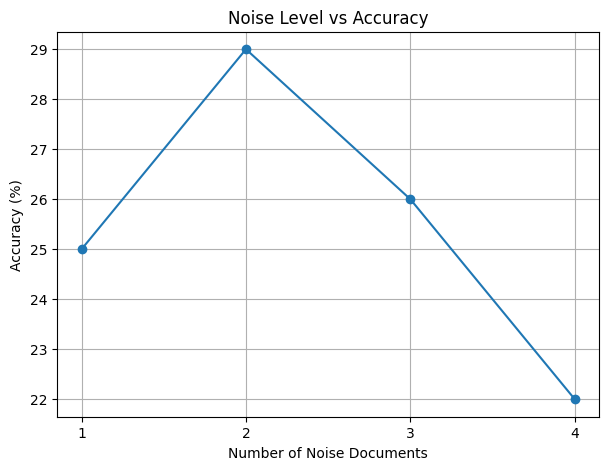

Experiment completed and plot saved as 'noise_vs_accuracy.png'


In [30]:
# Plot results
plt.figure(figsize=(7, 5))
plt.plot(noise_levels, [a*100 for a in accuracies], marker='o')
plt.title('Noise Level vs Accuracy')
plt.xlabel('Number of Noise Documents')
plt.ylabel('Accuracy (%)')
plt.xticks(noise_levels)
plt.grid(True)
plt.savefig('noise_vs_accuracy.png')
plt.show()

print("Experiment completed and plot saved as 'noise_vs_accuracy.png'")